In [1]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.stats          import pearsonr

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
processed_table_6169 = pd.read_csv('./data/processed_table.csv')

In [3]:
processed_table_6169 = processed_table_6169.drop('Unnamed: 0',  axis = 1)

In [4]:
encoder = LabelEncoder()
for column in processed_table_6169.columns[1:]:
    print(column)
    df = processed_table_6169[column]

    if processed_table_6169[column].dtype == object or processed_table_6169[column].dtype.name == 'category':
        processed_table_6169[column] = encoder.fit_transform(processed_table_6169[column])

y = processed_table_6169["has_contributed"]
X = processed_table_6169.drop("has_contributed", axis=1)

    

province
region
gender
language
number_of_campaigns
total_amount
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
Q1_Amount
Q2_Amount
Q3_Amount
Q4_Amount
Q1_Min
Q2_Min
Q3_Min
Q4_Min
Q1_Max
Q2_Max
Q3_Max
Q4_Max
Q1_Mean
Q2_Mean
Q3_Mean
Q4_Mean
age
age-group
amount
has_contributed


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21647 entries, 0 to 21646
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 21647 non-null  int64  
 1   province                21647 non-null  int32  
 2   region                  21647 non-null  int32  
 3   gender                  21647 non-null  int32  
 4   language                21647 non-null  int32  
 5   number_of_campaigns     21628 non-null  float64
 6   total_amount            21628 non-null  float64
 7   Q1_Donations            17038 non-null  float64
 8   Q2_Donations            14174 non-null  float64
 9   Q3_Donations            11590 non-null  float64
 10  Q4_Donations            13356 non-null  float64
 11  days_since_contributed  21628 non-null  float64
 12  mean                    21628 non-null  float64
 13  min                     21628 non-null  float64
 14  max                     21628 non-null

In [6]:
X = X.fillna(0)

In [7]:
logreg = LogisticRegression(solver = 'newton-cg', max_iter = 25)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)

    # predict probabilities
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

    # evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [8]:
print(eval_dict)

{'logreg': {'Acc_train': 0.9844904963041182, 'Acc_test': 0.9844495765973826}}


In [9]:
pred_test.sum()

131

In [10]:
y_test.sum()

210

In [11]:
confusion_matrix(y_test, pred_test)

array([[6274,   11],
       [  90,  120]], dtype=int64)

In [12]:
mlp_roc_train = roc_auc_score(y_test, pred_test)
mlp_roc_train

0.7848391862711672

In [13]:
processed_table_7244 = pd.read_csv('./data/processed_table_7244.csv')
processed_table_7244 = processed_table_7244.drop('Unnamed: 0',  axis = 1)
processed_table_7244.info()
processed_table_7244 = processed_table_7244.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 25645 non-null  int64  
 1   province                25645 non-null  object 
 2   region                  25645 non-null  object 
 3   gender                  25645 non-null  object 
 4   language                25645 non-null  object 
 5   number_of_campaigns     25644 non-null  float64
 6   total_amount            25644 non-null  float64
 7   Q1_Donations            13953 non-null  float64
 8   Q2_Donations            13337 non-null  float64
 9   Q3_Donations            10980 non-null  float64
 10  Q4_Donations            13061 non-null  float64
 11  days_since_contributed  25644 non-null  float64
 12  mean                    25644 non-null  float64
 13  min                     25644 non-null  float64
 14  max                     25644 non-null

In [14]:
encoder = LabelEncoder()
for column in processed_table_7244.columns[1:]:
    print(column)
    df = processed_table_7244[column]

    if processed_table_7244[column].dtype == object or processed_table_7244[column].dtype.name == 'category':
        processed_table_7244[column] = encoder.fit_transform(processed_table_7244[column])

y_test = processed_table_7244["has_contributed"]
X_test = processed_table_7244.drop("has_contributed", axis=1)

province
region
gender
language
number_of_campaigns
total_amount
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
Q1_Max
Q2_Max
Q3_Max
Q4_Max
Q1_Min
Q2_Min
Q3_Min
Q4_Min
Q1_Mean
Q2_Mean
Q3_Mean
Q4_Mean
Q1_Amount
Q2_Amount
Q3_Amount
Q4_Amount
age
age-group
amount
has_contributed


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 25645 non-null  int64  
 1   province                25645 non-null  int32  
 2   region                  25645 non-null  int32  
 3   gender                  25645 non-null  int32  
 4   language                25645 non-null  int32  
 5   number_of_campaigns     25645 non-null  float64
 6   total_amount            25645 non-null  float64
 7   Q1_Donations            25645 non-null  float64
 8   Q2_Donations            25645 non-null  float64
 9   Q3_Donations            25645 non-null  float64
 10  Q4_Donations            25645 non-null  float64
 11  days_since_contributed  25645 non-null  float64
 12  mean                    25645 non-null  float64
 13  min                     25645 non-null  float64
 14  max                     25645 non-null

In [16]:
y_test_pred = logreg.predict(X_test)

C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [17]:
# evaluate predictions
mlp_acc_test = accuracy_score(y_test, y_test_pred)
print(mlp_acc_test)

0.9939559368297913


In [18]:
y_test_pred.sum()

56

In [19]:
y_test.sum()

211

In [20]:
confusion_matrix(y_test, y_test_pred)

array([[25434,     0],
       [  155,    56]], dtype=int64)

In [21]:
mlp_roc_train = roc_auc_score(y_test, y_test_pred)
mlp_roc_train

0.6327014218009479

In [22]:
tree = DecisionTreeClassifier()
logistic = LogisticRegression(solver = "lbfgs")
randomForest = RandomForestClassifier(n_estimators = 25, n_jobs=-1)
svm = SVC(gamma = "scale", probability = True)
neighbors = KNeighborsClassifier()



models = {"tree" :tree,
"logistic" :logistic,
"randomForest" :randomForest,
#
# "boostedTree" :boostedTree,
"svm" :svm,
#"neuralNet" :neuralNet,
# "neighbors" :neighbors
}

In [23]:
from pandas import DataFrame
from numpy import array

for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

performances_train = {}
performances_test = {}


for model in models:
    predictions = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train))[1]
    accuracy = accuracy_score(y_train,predictions)
    auc = roc_auc_score(array(y_train),array(probabilities))
    performances_train[model] = {"Accuracy":accuracy,"AUC":auc}


for model in models:
    predictions = models[model].predict(X_test)
    probabilities = DataFrame(models[model].predict_proba(X_test))[1]
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(array(y_test),array(probabilities))
    performances_test[model] = {"Accuracy":accuracy,"AUC":auc}


tree has been trained successfully


C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic has been trained successfully
randomForest has been trained successfully
svm has been trained successfully


C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fi

In [24]:
performances_train

{'tree': {'Accuracy': 1.0, 'AUC': 1.0},
 'logistic': {'Accuracy': 0.992740232312566, 'AUC': 0.9916929025585148},
 'randomForest': {'Accuracy': 1.0, 'AUC': 1.0},
 'svm': {'Accuracy': 0.9654171066525871, 'AUC': 0.8320591117735098}}

In [25]:
performances_test

{'tree': {'Accuracy': 0.9989081692337688, 'AUC': 0.933649289099526},
 'logistic': {'Accuracy': 0.9956326769350751, 'AUC': 0.9434685890849543},
 'randomForest': {'Accuracy': 0.9909923961785924, 'AUC': 0.8748461308835022},
 'svm': {'Accuracy': 0.9917722752973289, 'AUC': 0.477128983966307}}

In [26]:
selectedFeatures = []

for column in X.columns:
    if column not in ('donorID', 'has_contributed'):
        (pearson,pvalue) = pearsonr(X[column],y)
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

province - p-vlue = 0.42581711153718604 - selected : 0
region - p-vlue = 3.7639638960984756e-07 - selected : 1
gender - p-vlue = 2.316547538109026e-68 - selected : 1
language - p-vlue = 2.173856588024299e-12 - selected : 1
number_of_campaigns - p-vlue = 4.445804831392096e-22 - selected : 1
total_amount - p-vlue = 1.2687242662283378e-06 - selected : 1
Q1_Donations - p-vlue = 4.557460204444329e-21 - selected : 1
Q2_Donations - p-vlue = 2.655068534613715e-19 - selected : 1
Q3_Donations - p-vlue = 1.008265910913911e-13 - selected : 1
Q4_Donations - p-vlue = 8.736574908868767e-07 - selected : 1
days_since_contributed - p-vlue = 0.0 - selected : 1
mean - p-vlue = 3.255273189870414e-27 - selected : 1
min - p-vlue = 2.784359216700466e-61 - selected : 1
max - p-vlue = 0.0004549500394281673 - selected : 1
Q1_Amount - p-vlue = 2.0008208419783332e-07 - selected : 1
Q2_Amount - p-vlue = 7.438886624861758e-07 - selected : 1
Q3_Amount - p-vlue = 0.0005734540268868706 - selected : 1
Q4_Amount - p-vlue

In [27]:
selectedFeatures

['region',
 'gender',
 'language',
 'number_of_campaigns',
 'total_amount',
 'Q1_Donations',
 'Q2_Donations',
 'Q3_Donations',
 'Q4_Donations',
 'days_since_contributed',
 'mean',
 'min',
 'max',
 'Q1_Amount',
 'Q2_Amount',
 'Q3_Amount',
 'Q4_Amount',
 'Q2_Min',
 'Q4_Min',
 'Q4_Mean',
 'age',
 'age-group',
 'amount']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21647 entries, 0 to 21646
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 21647 non-null  int64  
 1   province                21647 non-null  int32  
 2   region                  21647 non-null  int32  
 3   gender                  21647 non-null  int32  
 4   language                21647 non-null  int32  
 5   number_of_campaigns     21647 non-null  float64
 6   total_amount            21647 non-null  float64
 7   Q1_Donations            21647 non-null  float64
 8   Q2_Donations            21647 non-null  float64
 9   Q3_Donations            21647 non-null  float64
 10  Q4_Donations            21647 non-null  float64
 11  days_since_contributed  21647 non-null  float64
 12  mean                    21647 non-null  float64
 13  min                     21647 non-null  float64
 14  max                     21647 non-null

In [29]:
logreg = LogisticRegression(solver = 'newton-cg', max_iter = 25)

X = X[selectedFeatures]
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)

    # predict probabilities
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

    # evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [30]:
eval_dict

{'logreg': {'Acc_train': 0.9945881731784583, 'Acc_test': 0.993841416474211}}

In [31]:
processed_table_7244 = pd.read_csv('./data/processed_table_7244.csv')
processed_table_7244 = processed_table_7244.drop('Unnamed: 0',  axis = 1)
processed_table_7244.info()
processed_table_7244 = processed_table_7244.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 25645 non-null  int64  
 1   province                25645 non-null  object 
 2   region                  25645 non-null  object 
 3   gender                  25645 non-null  object 
 4   language                25645 non-null  object 
 5   number_of_campaigns     25644 non-null  float64
 6   total_amount            25644 non-null  float64
 7   Q1_Donations            13953 non-null  float64
 8   Q2_Donations            13337 non-null  float64
 9   Q3_Donations            10980 non-null  float64
 10  Q4_Donations            13061 non-null  float64
 11  days_since_contributed  25644 non-null  float64
 12  mean                    25644 non-null  float64
 13  min                     25644 non-null  float64
 14  max                     25644 non-null

In [32]:
encoder = LabelEncoder()
for column in processed_table_7244.columns[1:]:
    print(column)
    df = processed_table_7244[column]

    if processed_table_7244[column].dtype == object or processed_table_7244[column].dtype.name == 'category':
        processed_table_7244[column] = encoder.fit_transform(processed_table_7244[column])

y_test = processed_table_7244["has_contributed"]
X_test = processed_table_7244.drop("has_contributed", axis=1)
X_test.info()

province
region
gender
language
number_of_campaigns
total_amount
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
Q1_Max
Q2_Max
Q3_Max
Q4_Max
Q1_Min
Q2_Min
Q3_Min
Q4_Min
Q1_Mean
Q2_Mean
Q3_Mean
Q4_Mean
Q1_Amount
Q2_Amount
Q3_Amount
Q4_Amount
age
age-group
amount
has_contributed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 25645 non-null  int64  
 1   province                25645 non-null  int32  
 2   region                  25645 non-null  int32  
 3   gender                  25645 non-null  int32  
 4   language                25645 non-null  int32  
 5   number_of_campaigns     25645 non-null  float64
 6   total_amount            25645 non-null  float64
 7   Q1_Donations            25645 non-null  float64
 8   Q2_Donations            25645 non-null

In [33]:
X_test = X_test[selectedFeatures]

In [34]:
pd.set_option( "display.max_columns", None)
X_test.head()

,region,gender,language,number_of_campaigns,total_amount,Q1_Donations,Q2_Donations,Q3_Donations,Q4_Donations,days_since_contributed,mean,min,max,Q1_Amount,Q2_Amount,Q3_Amount,Q4_Amount,Q2_Min,Q4_Min,Q4_Mean,age,age-group,amount
0,1,0,2,12.0,178.49,3.0,3.0,1.0,5.0,2696.0,14.874167,6.69,30.0,42.39,64.79,7.44,63.87,10.00,6.69,12.774000,52,50,0.0
1,1,1,2,1.0,20.00,1.0,0.0,0.0,0.0,1589.0,20.000000,20.00,20.0,20.00,0.00,0.00,0.00,0.00,0.00,0.000000,67,60,0.0
2,1,1,1,3.0,124.37,0.0,1.0,0.0,2.0,2759.0,41.456667,24.79,50.0,0.00,49.58,0.00,74.79,49.58,24.79,37.395000,82,80,0.0
3,0,1,1,19.0,326.78,5.0,4.0,4.0,6.0,2610.0,17.198947,7.44,25.0,79.78,67.39,95.00,84.61,10.00,7.44,14.101667,87,80,0.0
4,0,1,1,1.0,40.00,1.0,0.0,0.0,0.0,1586.0,40.000000,40.00,40.0,40.00,0.00,0.00,0.00,0.00,0.00,0.000000,36,30,0.0


In [35]:
Y_Pred =  logreg.predict(X_test)
Y_Pred.sum()

162

In [36]:
confusion_matrix(y_test, Y_Pred)

array([[25430,     4],
       [   53,   158]], dtype=int64)

In [37]:
mlp_roc_train = roc_auc_score(y_test, Y_Pred)
mlp_roc_train

0.8743289480402209

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21647 entries, 0 to 21646
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  21647 non-null  int32  
 1   gender                  21647 non-null  int32  
 2   language                21647 non-null  int32  
 3   number_of_campaigns     21647 non-null  float64
 4   total_amount            21647 non-null  float64
 5   Q1_Donations            21647 non-null  float64
 6   Q2_Donations            21647 non-null  float64
 7   Q3_Donations            21647 non-null  float64
 8   Q4_Donations            21647 non-null  float64
 9   days_since_contributed  21647 non-null  float64
 10  mean                    21647 non-null  float64
 11  min                     21647 non-null  float64
 12  max                     21647 non-null  float64
 13  Q1_Amount               21647 non-null  float64
 14  Q2_Amount               21647 non-null

In [39]:
len(y)

21647

In [40]:
from pandas import DataFrame
from numpy import array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

performances_train = {}
performances_test = {}


for model in models:
    predictions = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train))[1]
    accuracy = accuracy_score(y_train,predictions)
    auc = roc_auc_score(array(y_train),array(probabilities))
    performances_train[model] = {"Accuracy":accuracy,"AUC":auc}


for model in models:
    predictions = models[model].predict(X_test)
    probabilities = DataFrame(models[model].predict_proba(X_test))[1]
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(array(y_test),array(probabilities))
    performances_test[model] = {"Accuracy":accuracy,"AUC":auc}

tree has been trained successfully


C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic has been trained successfully
randomForest has been trained successfully
svm has been trained successfully


In [41]:
performances_test

{'tree': {'Accuracy': 0.9981524249422633, 'AUC': 0.985236958745312},
 'logistic': {'Accuracy': 0.9935334872979215, 'AUC': 0.966359055953328},
 'randomForest': {'Accuracy': 0.9969207082371054, 'AUC': 0.9992756752661287},
 'svm': {'Accuracy': 0.9821401077752117, 'AUC': 0.9913096185172557}}

In [42]:
performances_train

{'tree': {'Accuracy': 1.0, 'AUC': 1.0},
 'logistic': {'Accuracy': 0.9944561774023232, 'AUC': 0.9827854193672284},
 'randomForest': {'Accuracy': 1.0, 'AUC': 1.0},
 'svm': {'Accuracy': 0.981850580781415, 'AUC': 0.9940348896918384}}

In [43]:
encoder = LabelEncoder()
for column in processed_table_7244.columns[1:]:
    print(column)
    df = processed_table_7244[column]

    if processed_table_7244[column].dtype == object or processed_table_7244[column].dtype.name == 'category':
        processed_table_7244[column] = encoder.fit_transform(processed_table_7244[column])

y_test = processed_table_7244["has_contributed"]
X_test = processed_table_7244.drop("has_contributed", axis=1)
X_test.info()

province
region
gender
language
number_of_campaigns
total_amount
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
Q1_Max
Q2_Max
Q3_Max
Q4_Max
Q1_Min
Q2_Min
Q3_Min
Q4_Min
Q1_Mean
Q2_Mean
Q3_Mean
Q4_Mean
Q1_Amount
Q2_Amount
Q3_Amount
Q4_Amount
age
age-group
amount
has_contributed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 25645 non-null  int64  
 1   province                25645 non-null  int32  
 2   region                  25645 non-null  int32  
 3   gender                  25645 non-null  int32  
 4   language                25645 non-null  int32  
 5   number_of_campaigns     25645 non-null  float64
 6   total_amount            25645 non-null  float64
 7   Q1_Donations            25645 non-null  float64
 8   Q2_Donations            25645 non-null

In [44]:
import sys

from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [45]:
X_test =  X[selectedFeatures]
len(y_test) 

25645

In [82]:
lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(y_test).copy() 

for (index,model) in enumerate(models):
    data[f"proba {model}"] = DataFrame(models[model].predict_proba(X_test))[1]
    lifts[model] = 1 - lift(dataSet = data, actuals = "has_contributed", probability = "proba "+str(model))
    responses[model] = 1 - cumulativeResponse(dataSet = data, actuals = "has_contributed", probability = "proba "+str(model))
    gains[model] = 1 - cumulativeGains(dataSet = data, actuals = "has_contributed", probability = "proba "+str(model))

C:\Users\vrajagopalan\OneDrive - IESEG\Desktop\Descriptive Analysis\Group_Project\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\vrajagopalan\OneDrive - IESEG\Desktop\Descriptive Analysis\Group_Project\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\vrajagopalan\OneDrive - IESEG\Desktop\Descriptive Analysis\Group_Project\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

C:\tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [83]:
responses

{'tree':    Quantile  Cumulative response  Average response
 0       0.0             0.991731          0.991731,
 'logistic':     Quantile  Cumulative response  Average response
 19      0.00             0.995383          0.991731
 18      0.05             0.994919          0.991731
 17      0.10             0.992301          0.991731
 16      0.15             0.993073          0.991731
 15      0.20             0.993348          0.991731
 14      0.25             0.992455          0.991731
 13      0.30             0.992609          0.991731
 12      0.35             0.992610          0.991731
 11      0.40             0.992814          0.991731
 10      0.45             0.992517          0.991731
 9       0.50             0.992189          0.991731
 8       0.55             0.992378          0.991731
 7       0.60             0.992111          0.991731
 6       0.65             0.992081          0.991731
 5       0.70             0.992054          0.991731
 4       0.75             0

In [84]:
data.head(20)

,has_contributed,proba tree,proba logistic,proba randomForest,proba svm
0,0,0.0,0.000254,0.0,0.007086
1,0,0.0,0.001577,0.0,0.007591
2,0,0.0,0.000091,0.0,0.018205
3,0,0.0,0.008514,0.0,0.008328
4,0,0.0,0.002921,0.0,0.011141
5,0,0.0,0.031763,0.0,0.004013
6,0,0.0,0.007611,0.0,0.010095
7,0,0.0,0.007611,0.0,0.010095
8,0,0.0,0.007611,0.0,0.010095
9,0,0.0,0.000780,0.0,0.004027


In [85]:
lifts["logistic"].head(20)

,Quantile,Lift,Base
19,0.00,0.441676,0.0
18,0.05,0.385560,0.0
17,0.10,0.068887,0.0
16,0.15,0.162321,0.0
15,0.20,0.195568,0.0
14,0.25,0.087509,0.0
13,0.30,0.106210,0.0
12,0.35,0.106269,0.0
11,0.40,0.130961,0.0
10,0.45,0.095014,0.0


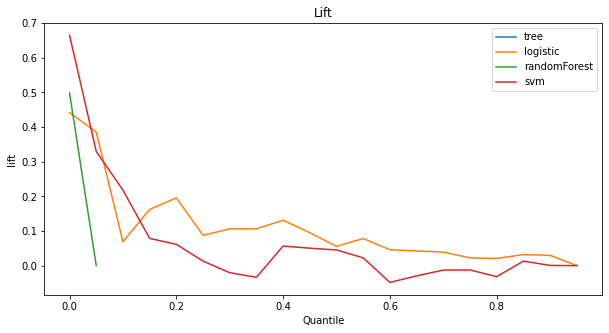

In [86]:

plt.figure(figsize=(10,5))
for model12 in models:
    plt.plot(lifts[model12]["Quantile"], lifts[model12]["Lift"], label = model12)
    plt.gca()
    plt.xlabel("Quantile")
    plt.ylabel("lift")
    plt.title("Lift")
    plt.legend()

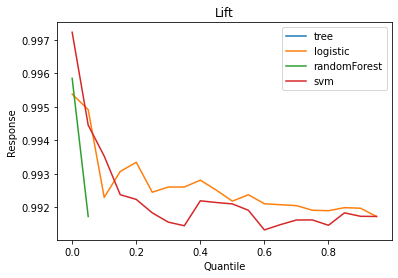

In [87]:
for model in models:
    pyplot.plot(responses[model]["Quantile"], responses[model]["Cumulative response"], label = model)
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("Response")
    pyplot.title("Lift")
    pyplot.legend()

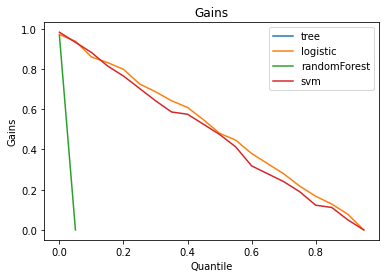

In [89]:
for model in models:
    pyplot.plot(gains[model]["Quantile"], gains[model]["Cumulative gains"], label = model)
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("Gains")
    pyplot.title("Gains")
    pyplot.legend()